# Modelagens

Tipo de problema: **Classificação Binária**

```python
1: sobrevive
0: não sobrevive
```

Propostas de resolução:

* Modelos de ML: 
    - **Regressão Logística** (modelo mais simples para implementar)
    - **Random Forest** 
    - **Naive Bayes**
* Método de Regularização: **Ridge** (pois temos poucas variáveis)
* Métricas de Avaliação: 
    - **matriz de confusão**
    - **acurácia** (avaliação geral)
    - **precisão** (maximizar os VP)
    - **sensibilidade** (recall)

Referências:

`https://diegomariano.com/metricas-de-avaliacao-em-machine-learning/`

`https://www.mariofilho.com/as-metricas-mais-populares-para-avaliar-modelos-de-machine-learning/`

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#importing the ML models
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# importing the metrics and dataset tools
from sklearn import metrics
from sklearn.model_selection import train_test_split

### Importando o dataset e selecionando as variáveis de treino e target

In [2]:
trainDF = pd.read_csv('../train-treated3.csv')
testDF = pd.read_csv('../test-treated3.csv')

In [3]:
trainDF.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,TitleCategory,Sex_Id,Family_Id
0,1,0,3.0,"Braund, Mr. Owen Harris",M,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,1,1
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,0,1


In [4]:
trainDF.shape

(936, 16)

In [5]:
x = trainDF.drop(columns=['Survived','Name','Sex','SibSp','Parch','Ticket', 'Cabin', 'Embarked','Title'])
y = trainDF.Survived

In [6]:
x.head(2)

,PassengerId,Pclass,Age,Fare,TitleCategory,Sex_Id,Family_Id
0,1,3.0,22.0,7.2500,0,1,1
1,2,1.0,38.0,71.2833,1,0,1


In [7]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [8]:
n_features = x.shape[1]

### Particionando conjuntos de treino e validação

In [9]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.25, random_state=1)

print('Tamanho do conjunto X de treino: {}'.format(x_train.shape[0]))
print('Tamanho do conjunto Y de treino: {}'.format(len(y_train)))
print('Tamanho do conjunto X de validação: {}'.format(x_valid.shape[0]))
print('Tamanho do conjunto Y de validação: {}'.format(len(y_valid)))

Tamanho do conjunto X de treino: 702
Tamanho do conjunto Y de treino: 702
Tamanho do conjunto X de validação: 234
Tamanho do conjunto Y de validação: 234


### Aplicando o modelo 1: Logistic Regression

In [10]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(x_train,y_train)

# calculando o score
y_score_LR = logreg.predict_proba(x_valid)[:, 1]

#
y_pred_LR=logreg.predict(x_valid)

/home/raissa/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
y_pred_LR

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0])

In [12]:
cnf_matrix1 = metrics.confusion_matrix(y_valid, y_pred_LR)
cnf_matrix1

array([[114,  23],
       [ 35,  62]])

Text(0.5, 257.44, 'Predicted label')

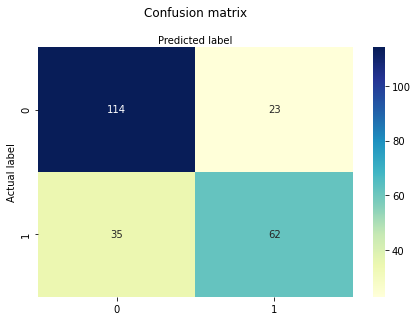

In [13]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(2)

plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#labels =  ['A','B','C','D']
#labels = np.array([['A', 'B'],['C', 'D']])

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix1), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
#plt.annotate('VP', xy=(0,1))

In [14]:
Acc_LR = round(metrics.accuracy_score(y_valid, y_pred_LR)*100, 2)
Prec_LR = round(metrics.precision_score(y_valid, y_pred_LR)*100, 2)
Recall_LR = round(metrics.recall_score(y_valid, y_pred_LR)*100, 2)

### Aplicando o modelo 2: Random Forest

In [15]:
# instantiate the model (using default parameters)
modeloRF = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)

# fit the model with data
modeloRF.fit(x_train, y_train)

# calculating the score
y_score_RF = modeloRF.predict_proba(x_valid)[:, 1]

# predicting values
y_pred_RF = modeloRF.predict(x_valid)

In [16]:
cnf_matrix2 = metrics.confusion_matrix(y_valid, y_pred_RF)
cnf_matrix2

array([[120,  17],
       [ 28,  69]])

Text(0.5, 257.44, 'Predicted label')

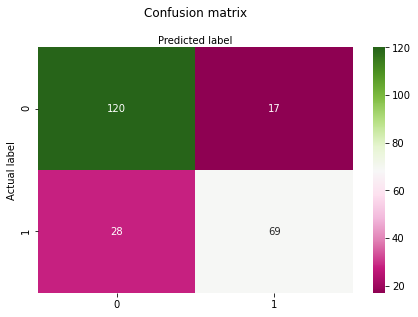

In [17]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(2)

plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix2), annot=True, cmap="PiYG" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [18]:
Acc_RF = round(metrics.accuracy_score(y_valid, y_pred_RF)*100, 2)
Prec_RF = round(metrics.precision_score(y_valid, y_pred_RF)*100, 2)
Recall_RF = round(metrics.recall_score(y_valid, y_pred_RF)*100, 2)

### Aplicando o modelo 3: Naive Bayes

In [19]:
#Create a Gaussian Classifier
modelNB = GaussianNB()

# Train the model using the training sets
modelNB.fit(x_train, y_train)

# calculating the score
y_score_NB = modelNB.predict_proba(x_valid)[:, 1]

#Performing prediction
y_pred_NB= modelNB.predict(x_valid)

In [20]:
cnf_matrix3 = metrics.confusion_matrix(y_valid, y_pred_NB)
cnf_matrix3

array([[106,  31],
       [ 28,  69]])

Text(0.5, 257.44, 'Predicted label')

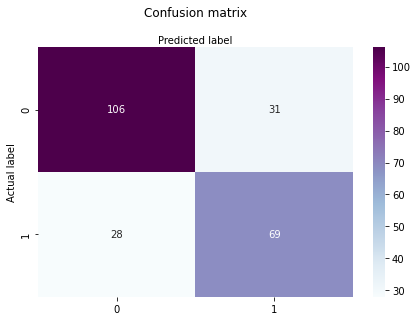

In [21]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(2)

plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix3), annot=True, cmap="BuPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [22]:
Acc_NB = round(metrics.accuracy_score(y_valid, y_pred_NB)*100, 2)
Prec_NB = round(metrics.precision_score(y_valid, y_pred_NB)*100, 2)
Recall_NB = round(metrics.recall_score(y_valid, y_pred_NB)*100, 2)

In [23]:
metrics_dict = {'Accuracy': [Acc_LR, Acc_RF, Acc_NB],\
                'Precision': [Prec_LR, Prec_RF, Prec_NB],\
                'Recall': [Recall_LR, Recall_RF, Recall_NB]}

metrics_df = pd.DataFrame(data=metrics_dict)
metrics_df.rename(index={0: 'Logistic Regression', 1: 'Random Forest', 2: 'Naive Bayes'}, inplace=True)
metrics_df

,Accuracy,Precision,Recall
Logistic Regression,75.21,72.94,63.92
Random Forest,80.77,80.23,71.13
Naive Bayes,74.79,69.00,71.13


Random Forest parece ser o modelo melhor, com maior acurácia e precisão, porém o recall parece muito baixo!

## Como melhorar o modelo?

Possíveis caminhos:
- Curva ROC, Precision-Recall
- CV 3-folds

In [24]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve

In [25]:
#Aplicando o CV para cada modelo e calculando a acurácia e desvio padrão médios

#Logistic Regression
score_LR = cross_val_score(logreg, x_train, y_train, cv=3)
LR_CV_metrics = [score_LR.mean(), score_LR.std()]

#Random Forest
score_RF = cross_val_score(modeloRF, x_train, y_train, cv=3)
LR_CV_metrics = [score_RF.mean(), score_RF.std()]

#Naive Bayes
score_NB = cross_val_score(modelNB, x_train, y_train, cv=3)
LR_CV_metrics = [score_NB.mean(), score_NB.std()]


#Mostrando os resultados num dataframe
CVmetrics = {'Accuracy': [score_LR.mean(), score_RF.mean(), score_NB.mean()],\
                'SD': [score_LR.std(), score_RF.std(), score_NB.std()]}

CVmetrics_df = pd.DataFrame(data=CVmetrics)
CVmetrics_df.rename(index={0: 'Logistic Regression', 1: 'Random Forest', 2: 'Naive Bayes'}, inplace=True)
CVmetrics_df

/home/raissa/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/raissa/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

,Accuracy,SD
Logistic Regression,0.811966,0.017447
Random Forest,0.839031,0.014102
Naive Bayes,0.792023,0.012254


In [26]:
print(score_LR, score_RF, score_NB)

[0.79059829 0.83333333 0.81196581] [0.82905983 0.82905983 0.85897436] [0.77777778 0.80769231 0.79059829]


In [27]:
# Compute ROC curve and ROC area for each class

fpr = dict()  #False Positive Rates
tpr = dict()  #True Positive Rates
roc_auc = dict()

# generate a no skill (ns) prediction (majority class) 
ns_probs = [0 for _ in range(len(y_valid))]

# calculate scores
ns_auc = roc_auc_score(y_valid, ns_probs)
LR_auc = roc_auc_score(y_valid, y_score_LR)
RF_auc = roc_auc_score(y_valid, y_score_RF)
NB_auc = roc_auc_score(y_valid, y_score_NB)

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_valid, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_valid, y_score_LR)
rf_fpr, rf_tpr, _ = roc_curve(y_valid, y_score_RF)
nb_fpr, nb_tpr, _ = roc_curve(y_valid, y_score_NB)


# summarize scores
print('Logistic: ROC AUC=%.3f' % (LR_auc))
print('Regression: ROC AUC=%.3f' % (RF_auc))
print('Naive Bayes: ROC AUC=%.3f' % (NB_auc))

Logistic: ROC AUC=0.818
Regression: ROC AUC=0.854
Naive Bayes: ROC AUC=0.820


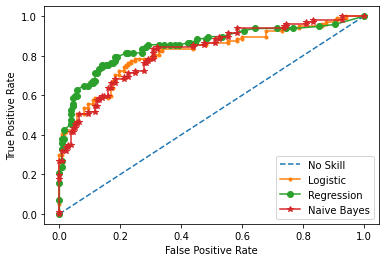

In [28]:
# plot the ROC curve for the model

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.plot(rf_fpr, rf_tpr, marker='o', label='Regression')
plt.plot(nb_fpr, nb_tpr, marker='*', label='Naive Bayes')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()

In [29]:
# calculating precision-recall curves
lr_precision, lr_recall, _ = precision_recall_curve(y_valid, y_score_LR)
rf_precision, rf_recall, _ = precision_recall_curve(y_valid, y_score_RF)
nb_precision, nb_recall, _ = precision_recall_curve(y_valid, y_score_NB)

# calculate precision-recall AUC
lr_auc = auc(lr_recall, lr_precision)
rf_auc = auc(rf_recall, rf_precision)
nb_auc = auc(nb_recall, nb_precision)

# summarize scores
print('Logistic: AUC=%.3f' % (lr_auc))
print('Regression: AUC=%.3f' % (rf_auc))
print('Naive Bayes: AUC=%.3f' % (nb_auc))

Logistic: AUC=0.810
Regression: AUC=0.849
Naive Bayes: AUC=0.798


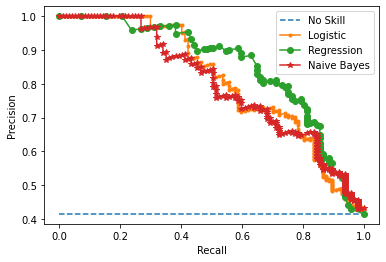

In [30]:
# plot the precision-recall curves
no_skill = len(y_valid[y_valid==1]) / len(y_valid)

plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
plt.plot(rf_recall, rf_precision, marker='o', label='Regression')
plt.plot(nb_recall, nb_precision, marker='*', label='Naive Bayes')

# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')

# show the legend
plt.legend()

# show the plot
plt.show()